# Seaborn

"`Seaborn` is a Python visualization library based on `Matplotlib`. It provides a high-level interface for drawing attractive statistical graphics."

Let's import it and give it the alias `sns`, which is done by convention.

In [110]:
import seaborn as sns
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

The `sns.set()` function allows us to change some of the `rcParams`. Here, we're changing the plot's face color.

`seaborn` has the capacity to create a large number of informative, beautiful plots very easily. Here we'll review several types, but please visit their [gallery](https://seaborn.pydata.org/examples/index.html) for a more complete picture of all that you can do with `seaborn`.

## Histograms

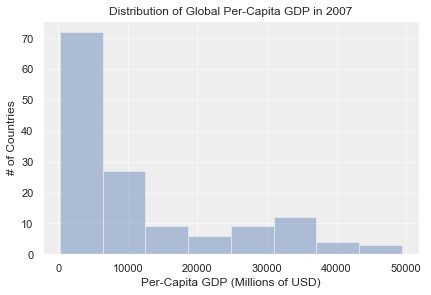

In [188]:
sns.distplot(gm_latest['gdpPercap'])
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

#### Kernel Density Plots

We learned earlier that histograms can be used to visualize the discretized distribution of a variable. We must specify the number of bins in a histogram and as a result the shape of the distribution can change wildly dependening on that somewhat arbitrary choice.

A better way to plot a distribution is to estimate it's kernel density and plot it using `sns.kdeplot()`. Let's plot the kernel density for per-capita GDP in 2007 as we did earlier using a Hist. In fact, let's plot the two side by side using subplots.

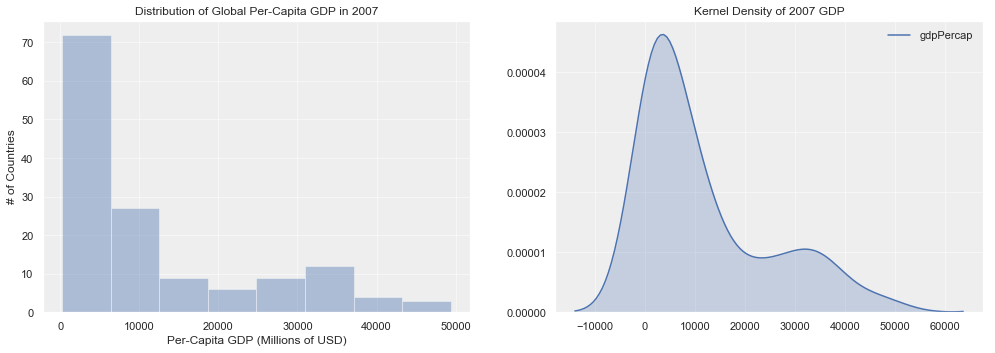

In [212]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(gm_latest['gdpPercap'], kde=False)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

plt.subplot(1,2,2)
sns.kdeplot(gm_latest['gdpPercap'], shade=True)
plt.title('Kernel Density of 2007 GDP');

In fact, both of these plots can be useful, and `seaborn` has another plot type called `sns.distplot()` which combines the two. Let's see how it works.

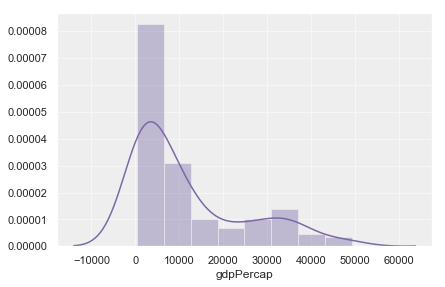

In [55]:
sns.distplot(gm_latest['gdpPercap'], color='#7A68A6')

#### Joint Distribution Plots

We've already used scatter plots to visualize the relationship between two variables. It is sometimes useful to not only see the relationship between the two variables, but to visualize each variables respective distribution. The `sns.jointplot` function in `seaborn` let's you do just that.

Let's compare the log of per-capita GDP and life expectancy in a joint distribution plot.

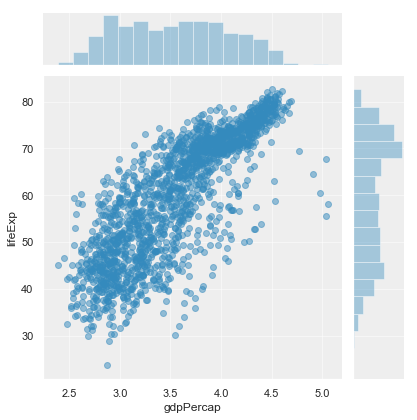

In [56]:
sns.jointplot(np.log10(gm['gdpPercap']), gm['lifeExp'], color="#348ABD", alpha=0.5);

In [ ]:
sns.distplot(gm_latest['gdpPercap'], kde=False)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

## Bar Plots

Text(0, 0.5, 'Number of Countries')

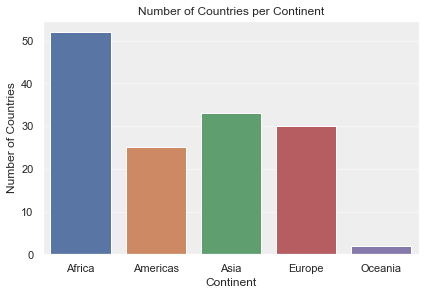

In [194]:
sns.barplot(x="continent", y="n_countries", data=country_counts)
plt.title('Number of Countries per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')

## Boxplots

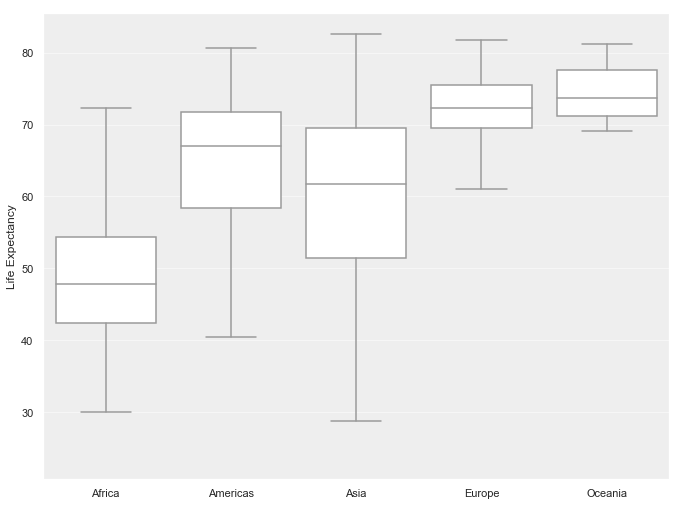

In [197]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="continent", y="lifeExp", data=gm,
            order=np.sort(gm.continent.unique()),
            color='white', fliersize=0)

plt.xlabel('')
plt.ylabel('Life Expectancy');

### Boxplot with strip plot

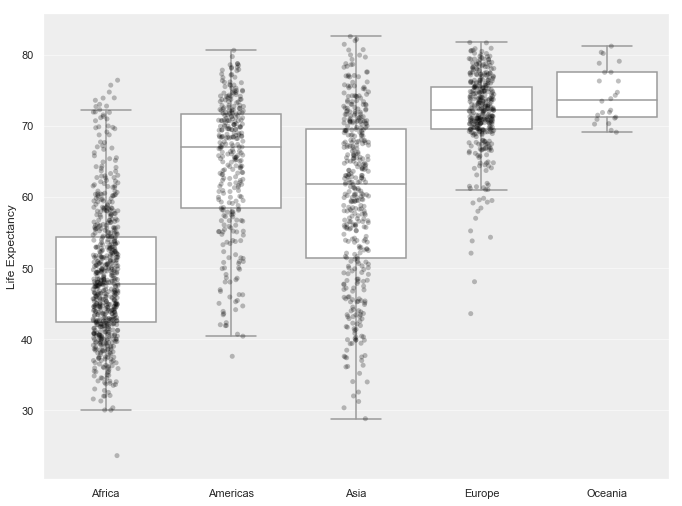

In [198]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="continent", y="lifeExp", data=gm,
            order=np.sort(gm.continent.unique()),
            color='white', fliersize=0)
sns.stripplot(x="continent", y="lifeExp", data=gm,
              order=np.sort(gm.continent.unique()),
              alpha=0.25, size=5, jitter=True,
              color='Black', edgecolor='Black')

plt.xlabel('')
plt.ylabel('Life Expectancy');

With just a few lines of code we have a very nice looking plot using `seaborn`. It's possible to create a stripplot using `Matplotlib`, but it's not as easy as it is with `Seaborn`.

## Scatterplots

### Scatter Plots

Next, let's imagine that we're interested in looking for a relationship between two variables, where both variables can take the same value multiple times, unlike time-series data where the time variable is constantly increasing. **Scatter plots** are a powerful way to visualize the joint distribution of your data points across two variables. 

To illustrate this we'll use `plt.scatter` to visualize the relationship between per capita GDP (`gdpPercap` on the $x$-axis) and life expectancy (`lifeExp`on the $y$-axis) across all countries and all years. Specifying the `marker='.'` argument tells the plot to use small circles to indicate each data point. There are many other marker styles, see [here](http://matplotlib.org/api/markers_api.html#markers) for more.

Text(0, 0.5, 'Life Expectency (years)')

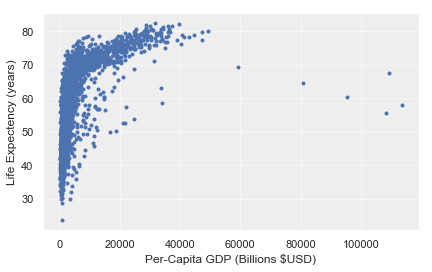

In [94]:
plt.scatter(gm['gdpPercap'], gm['lifeExp'], marker='.')
plt.xlabel('Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)')

Like with `plt.plot()`, the first argument in `plt.scatter()` corresponds to the $x$-axis and the second to the $y$-axis.

#### Transormations

The above scatter plot has some really large GDP values out to the right of the plot. When dealing with data that have large outliers like this, plotting a transformation of the data can make it more interpretable. A standard transformation is to apply the `log` function, so let's try that here.

**NOTE** Let's not forget to change the x-axis label to indicate the new units being displayed! 

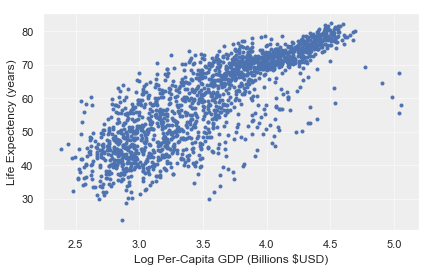

In [95]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

That looks much better. We can now see there is somehwhat of a linear relationship between the log of GDP and life expectancy. Interesting!

#### Transparency

This plot looks good, but could be better, especially since there are so many points and they overlap. To fix that we can change the transparency, or opacity, of the face and edges of the markers using the `alpha` parameter. This is a value from `0`-`1`, where `0` is completely transparent (e.g. it's not displayed) to `1` being completely opaque (which is the default seen in the previous plot).

And while we're at it we'll change the fill color with the `facecolor` parameter, and the border color of each marker with the `edgecolor` parameter using one of:

* single letters representing built-in colors (e.g., `b` for blue)
* html hex strings
* html color names
* RGB tuples (with each element between 0 and 1)
* string encoded floating point values between 0 and 1 (for gray shades)

For *no* color, use `'None'`. For more information on colors in `Matplotlib` see [the documentation](http://matplotlib.org/api/colors_api.html#colors).

A great place to find information on color palettes is [ColorBrewer](http://colorbrewer2.org/). Matt Davis has created a great Python package called [Palettable](https://jiffyclub.github.io/palettable/) that gives you access to the ColorBrewer, Cubehelix, Tableau, and Wes Anderson palettes.

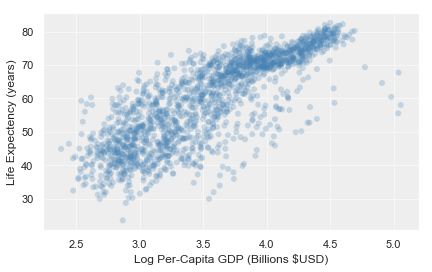

In [96]:
plt.scatter(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=0.25,
            facecolor='SteelBlue',
            edgecolor='None')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

Now that we've seen that there exists a relationship between GDP and life expectancy at the global scale and across the last 50 years, let's see if we can use similar scatter plots to break that relationship down as a function of both time (year) and location (continent). 

To do that we'll introduce two new techniques, the use of color and `subplots`.

#### Color

Although color was the worst of the 6 perceptual tasks found by Cleveland and McGill it can still be a useful way to add even more information to figure. 

Within a scatter plot, each data point may be assigned a different color depending on it's value in a third variable. To do so, we provide to additional keyword arguments to the `plt.scatter` method. 

The first is `c=<third_color_variable>`, where <third_color_variable> is a list-like sequence of values that is the same length as the data being plotted. The numbers will be normalized from 0-1, so any numbers will do. The second is `cmap=<colormap_name>`, where <colormap_name> is the name of `matplotlib` colormap, see [here](https://matplotlib.org/tutorials/colors/colormaps.html) for possibilites.

We'll make the same exact scatter plot as we just did, but add color to represent the year the data comes from. We'll use the `hot` colormap which goes from black->red->orange->yellow->white.

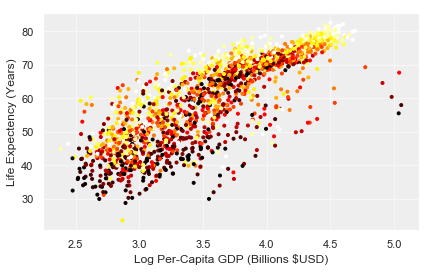

In [97]:
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (Years)');

While we can see there is some sort of trend dependent on color, we don't know what the color values mean. 

We can use `plt.colorbar()` to add a colorbar which will let us intepret the colors. By adding `.set_label()` to it we can set a textual label describing what the values in the colorbar represent.

We'll also increase the figure size, and the font size used in the title, xlabel and ylabel using the `fontsize=16` parameter. We'll also use a form of LaTeX called MathJax to write a subscript 10 underneath the word Log, like this: $Log_{10}$.

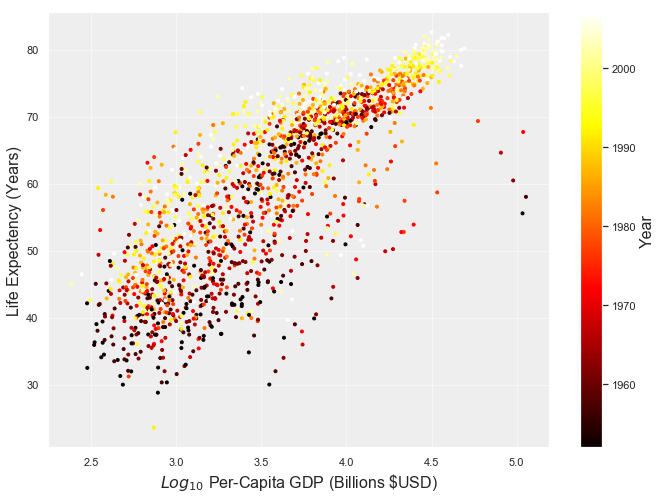

In [98]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(gm['gdpPercap']), gm['lifeExp'], marker='.', c=gm['year'], cmap='hot')
plt.xlabel('$Log_{10}$ Per-Capita GDP (Billions \$USD)', fontsize=16)
plt.ylabel('Life Expectency (Years)', fontsize=16)
plt.colorbar().set_label('Year', fontsize=16);